In [ ]:
# First we will import the necessary Library 

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
maindf=pd.read_csv('BTC-USD.csv',encoding= 'unicode_escape')

In [ ]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  822
Total number of fields present in the dataset:  7


In [ ]:
maindf.shape

(822, 7)

In [ ]:
maindf

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-24,8405.567383,8514.666992,8266.840820,8445.434570,8445.434570,24397913026
1,2020-01-25,8440.119141,8458.453125,8296.218750,8367.847656,8367.847656,19647331549
2,2020-01-26,8364.410156,8602.401367,8325.498047,8596.830078,8596.830078,22177678796
3,2020-01-27,8597.308594,8977.726563,8597.308594,8909.819336,8909.819336,28647338393
4,2020-01-28,8912.524414,9358.589844,8908.447266,9358.589844,9358.589844,34398744403
...,...,...,...,...,...,...,...
817,2022-04-20,41501.746094,42126.300781,40961.097656,41374.378906,41374.378906,27819532341
818,2022-04-21,41371.515625,42893.582031,40063.828125,40527.363281,40527.363281,35372786395
819,2022-04-22,40525.863281,40777.757813,39315.417969,39740.320313,39740.320313,28011716745
820,2022-04-23,39738.722656,39935.859375,39352.203125,39486.730469,39486.730469,16138021249


In [ ]:
maindf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-24,8405.567383,8514.666992,8266.840820,8445.434570,8445.434570,24397913026
1,2020-01-25,8440.119141,8458.453125,8296.218750,8367.847656,8367.847656,19647331549
2,2020-01-26,8364.410156,8602.401367,8325.498047,8596.830078,8596.830078,22177678796
3,2020-01-27,8597.308594,8977.726563,8597.308594,8909.819336,8909.819336,28647338393
4,2020-01-28,8912.524414,9358.589844,8908.447266,9358.589844,9358.589844,34398744403


In [ ]:
maindf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
817,2022-04-20,41501.746094,42126.300781,40961.097656,41374.378906,41374.378906,27819532341
818,2022-04-21,41371.515625,42893.582031,40063.828125,40527.363281,40527.363281,35372786395
819,2022-04-22,40525.863281,40777.757813,39315.417969,39740.320313,39740.320313,28011716745
820,2022-04-23,39738.722656,39935.859375,39352.203125,39486.730469,39486.730469,16138021249
821,2022-04-24,39503.585938,39799.472656,39441.691406,39448.128906,39448.128906,15977023488


In [ ]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       822 non-null    object 
 1   Open       822 non-null    float64
 2   High       822 non-null    float64
 3   Low        822 non-null    float64
 4   Close      822 non-null    float64
 5   Adj Close  822 non-null    float64
 6   Volume     822 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 45.1+ KB


In [ ]:
maindf.describe()


,Open,High,Low,Close,Adj Close,Volume
count,822.000000,822.000000,822.000000,822.000000,822.000000,8.220000e+02
mean,31501.585159,32325.780969,30591.553166,31533.896103,31533.896103,3.860336e+10
std,18691.129556,19169.295967,18122.566160,18669.781572,18669.781572,2.010317e+10
min,5002.578125,5331.833984,4106.980957,4970.788086,4970.788086,1.225260e+10
25%,10676.835693,10798.186279,10530.265869,10683.807617,10683.807617,2.626037e+10
50%,35813.751953,37273.402343,34247.214844,35826.828125,35826.828125,3.467315e+10
75%,46988.609375,48088.957032,45775.000000,46926.733399,46926.733399,4.606627e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [ ]:
print('Null Values:',maindf.isnull().values.sum())

Null Values: 0


In [ ]:
print('NA values:',maindf.isnull().values.any())

NA values: False


In [ ]:
maindf.shape

(822, 7)

In [ ]:
sd=maindf.iloc[0][0]
ed=maindf.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2020-01-24
Ending Date 2022-04-24


In [ ]:
# Analysis of 2020
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2020 = maindf.loc[(maindf['Date'] >= '2020-01-24')
                     & (maindf['Date'] < '2021-01-24')]

y_2020.drop(y_2020[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2020-01-24,8405.567383,8514.666992,8266.840820,8445.434570
1,2020-01-25,8440.119141,8458.453125,8296.218750,8367.847656
2,2020-01-26,8364.410156,8602.401367,8325.498047,8596.830078
3,2020-01-27,8597.308594,8977.726563,8597.308594,8909.819336
4,2020-01-28,8912.524414,9358.589844,8908.447266,9358.589844
...,...,...,...,...,...
361,2021-01-19,36642.234375,37755.890625,36069.804688,36069.804688
362,2021-01-20,36050.113281,36378.328125,33570.476563,35547.750000
363,2021-01-21,35549.398438,35552.679688,30250.750000,30825.699219
364,2021-01-22,30817.625000,33811.851563,28953.373047,33005.761719


In [ ]:
monthvise= y_2020.groupby(y_2020['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,28469.167717,28601.331842
February,9656.215113,9630.722185
March,6943.507009,6871.016113
April,7150.611328,7224.477328
May,9237.761530,9263.151745
June,9499.797005,9489.227214
July,9519.383852,9589.899729
August,11639.097215,11652.394185
September,10689.700163,10660.276856


In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()


In [ ]:
y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2020.groupby(maindf['Date'].dt.strftime('%B'))['High'].mean()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Low'].mean()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Bitcoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Bitcoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low Bitcoin price')
fig.show()

In [ ]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2020, x=y_2020.Date, y=[y_2020['Open'], y_2020['Close'], 
                                          y_2020['High'], y_2020['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
# Analysis of 2021
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2021 = maindf.loc[(maindf['Date'] >= '2021-01-24')
                     & (maindf['Date'] < '2022-01-24')]

y_2021.drop(y_2021[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
366,2021-01-24,32064.376953,32944.007813,31106.685547,32289.378906
367,2021-01-25,32285.798828,34802.742188,32087.787109,32366.392578
368,2021-01-26,32358.613281,32794.550781,31030.265625,32569.849609
369,2021-01-27,32564.029297,32564.029297,29367.138672,30432.546875
370,2021-01-28,30441.041016,33858.312500,30023.207031,33466.097656
...,...,...,...,...,...
726,2022-01-19,42374.039063,42478.304688,41242.914063,41744.328125
727,2022-01-20,41744.027344,43413.023438,40672.824219,40680.417969
728,2022-01-21,40699.605469,41060.527344,35791.425781,36457.316406
729,2022-01-22,36471.589844,36688.812500,34349.250000,35030.250000


In [ ]:
monthvise= y_2021.groupby(y_2021['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,40235.655746,39917.732359
February,45874.967216,46306.798968
March,54544.678176,54998.008695
April,57251.256250,57206.720052
May,47105.828503,46443.286668
June,35920.546940,35845.154688
July,34234.212450,34444.973790
August,45516.119834,45709.022682
September,46041.859375,45939.771484


In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

In [ ]:
y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2021.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Bitcoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Bitcoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low Bitcoin price')
fig.show()

In [ ]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2021, x=y_2021.Date, y=[y_2021['Open'], y_2021['Close'], 
                                          y_2021['High'], y_2021['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
# Analysis of 2022
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2022 = maindf.loc[(maindf['Date'] >= '2022-01-01')
                     & (maindf['Date'] < '2022-04-25')]

y_2022.drop(y_2022[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
708,2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500
709,2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750
710,2022-01-03,47343.542969,47510.726563,45835.964844,46458.117188
711,2022-01-04,46458.851563,47406.546875,45752.464844,45897.574219
712,2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906
...,...,...,...,...,...
817,2022-04-20,41501.746094,42126.300781,40961.097656,41374.378906
818,2022-04-21,41371.515625,42893.582031,40063.828125,40527.363281
819,2022-04-22,40525.863281,40777.757813,39315.417969,39740.320313
820,2022-04-23,39738.722656,39935.859375,39352.203125,39486.730469


In [ ]:
monthvise= y_2022.groupby(y_2022['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,41368.073463,41114.422379
February,40591.103934,40763.474051
March,41889.148438,41966.237525
April,42300.316081,42046.791992
May,NaN,NaN
June,NaN,NaN
July,NaN,NaN
August,NaN,NaN
September,NaN,NaN


In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

In [ ]:
y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2022.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Bitcoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Bitcoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low Bitcoin price')
fig.show()

In [ ]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2022, x=y_2022.Date, y=[y_2022['Open'], y_2022['Close'], 
                                          y_2022['High'], y_2022['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
# Overall Analysis
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_overall = maindf.loc[(maindf['Date'] >= '2020-01-24')
                     & (maindf['Date'] <= '2022-04-24')]

y_overall.drop(y_overall[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2020-01-24,8405.567383,8514.666992,8266.840820,8445.434570
1,2020-01-25,8440.119141,8458.453125,8296.218750,8367.847656
2,2020-01-26,8364.410156,8602.401367,8325.498047,8596.830078
3,2020-01-27,8597.308594,8977.726563,8597.308594,8909.819336
4,2020-01-28,8912.524414,9358.589844,8908.447266,9358.589844
...,...,...,...,...,...
817,2022-04-20,41501.746094,42126.300781,40961.097656,41374.378906
818,2022-04-21,41371.515625,42893.582031,40063.828125,40527.363281
819,2022-04-22,40525.863281,40777.757813,39315.417969,39740.320313
820,2022-04-23,39738.722656,39935.859375,39352.203125,39486.730469


In [ ]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,34679.340290,34628.755943
February,31777.414476,31967.748093
March,34459.111207,34611.754111
April,35086.471587,35024.511062
May,28171.795017,27853.219207
June,22710.171973,22667.190951
July,21876.798151,22017.436760
August,28577.608524,28680.708433
September,28365.779769,28300.024170


In [ ]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'], 
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
# Building model
closedf = maindf[['Date','Close']]
close_stock = closedf.copy()
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (822, 2)


In [ ]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2020-2022', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(822, 1)


In [ ]:
training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (575, 1)
test_data:  (247, 1)


In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (559, 15)
y_train:  (559,)
X_test:  (231, 15)
y_test (231,)


In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (559, 15, 1)
X_test:  (231, 15, 1)


In [ ]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
18/18 [==============================] - 2s 24ms/step - loss: 0.4295 - val_loss: 0.8863
Epoch 2/200
18/18 [==============================] - 0s 9ms/step - loss: 0.2640 - val_loss: 0.5665
Epoch 3/200
18/18 [==============================] - 0s 9ms/step - loss: 0.1657 - val_loss: 0.3441
Epoch 4/200
18/18 [==============================] - 0s 9ms/step - loss: 0.0962 - val_loss: 0.1873
Epoch 5/200
18/18 [==============================] - 0s 11ms/step - loss: 0.0490 - val_loss: 0.0797
Epoch 6/200
18/18 [==============================] - 0s 9ms/step - loss: 0.0164 - val_loss: 0.0077
Epoch 7/200
18/18 [==============================] - 0s 11ms/step - loss: 0.0024 - val_loss: 0.0058
Epoch 8/200
18/18 [==============================] - 0s 11ms/step - loss: 0.0021 - val_loss: 0.0031
Epoch 9/200
18/18 [==============================] - 0s 9ms/step - loss: 0.0019 - val_loss: 0.0030
Epoch 10/200
18/18 [==============================] - 0s 8ms/step - loss: 0.0017 - val_loss: 0.0030
Epoch

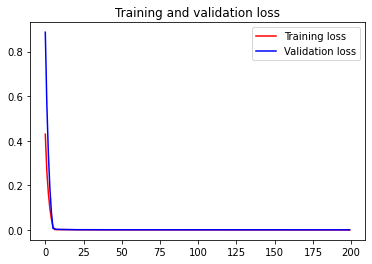

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

((559, 1), (231, 1))

In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  1347.4433050928312
Train data MSE:  1815603.4604394927
Train data MAE:  841.9645458932804
-------------------------------------------------------------------------------------
Test data RMSE:  1843.2606600223478
Test data MSE:  3397609.860786021
Test data MAE:  1385.2373173647186


In [ ]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9941901963180435
Test data explained variance regression score: 0.9493036689321596


In [ ]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.994177837174583
Test data R2 score: 0.9491162899454785


In [ ]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.002293865973054993
Test data MGD:  0.0015139021522662145
----------------------------------------------------------------------
Train data MPD:  50.95628739592058
Test data MPD:  70.84912362437443


In [ ]:
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Bitcoin price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (822, 1)
Test predicted data:  (822, 1)


In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Bitcoin price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Bitcoin price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing Bitcoin price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Bitcoin')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()